In [ ]:
#import packages & libraries
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

#initialize plotly
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
file1 =pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-10.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                ) 

In [ ]:
file2 =pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-11.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                ) 

In [ ]:
file3 =pd.read_csv("/content/sample_data/BTCUSDC-1d-2021-12.csv", 
                 names=['Open time',
                        'Open',
                        'High',
                        'Low',
                        'Close',
                        'Volume',
                        'Close time',
                        'Quote asset volume',
                        'Number of trades',
                        'Taker buy base asset volume',
                        'Taker buy quote asset volume',
                        'Ignore']
                ) 

In [ ]:
file1['Open time'] = pd.to_datetime(file1['Open time'],unit='ms')
file2['Open time'] = pd.to_datetime(file2['Open time'],unit='ms')
file3['Open time'] = pd.to_datetime(file3['Open time'],unit='ms')

In [ ]:
Data=pd.concat([file1, file2])
Data=Data[{'Open time','Close'}]
#Data.set_index('Open time',inplace=True)
df=Data

In [ ]:
df.head(-1)

,Open time,Close
0,2021-10-01,48147.38
1,2021-10-02,47672.68
2,2021-10-03,48220.00
3,2021-10-04,49247.63
4,2021-10-05,51488.94
5,2021-10-06,55330.92
6,2021-10-07,53767.81
7,2021-10-08,53918.86
8,2021-10-09,54967.95
9,2021-10-10,54683.46


In [ ]:
prophet_df = df.rename(columns={'Open time':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model = Prophet(
		yearly_seasonality='auto', 
		weekly_seasonality=True, 
		daily_seasonality=True, 
		seasonality_mode='multiplicative' # multiplicative seasonality (for more non-linear data)
	)


model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#forecast
future = model.make_future_dataframe(periods=10)

#predict
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-10-01,48914.806318,45921.736595,50754.511554,48914.806318,48914.806318,-0.010119,-0.010119,-0.010119,-0.010119,-0.010119,-0.010119,0.0,0.0,0.0,48419.857946
1,2021-10-02,49640.816453,46981.901040,51648.462411,49640.816453,49640.816453,-0.005819,-0.005819,-0.005819,-0.005819,-0.005819,-0.005819,0.0,0.0,0.0,49351.976180
2,2021-10-03,50366.826588,48111.824373,52578.782252,50366.826588,50366.826588,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.0,0.0,0.0,50368.720747
3,2021-10-04,51092.836723,49365.447965,54054.980832,51092.836723,51092.836723,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,0.0,0.0,0.0,51605.573639
4,2021-10-05,51818.846859,49735.789360,54250.910373,51818.846859,51818.846859,0.006217,0.006217,0.006217,0.006217,0.006217,0.006217,0.0,0.0,0.0,52140.999730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2021-12-06,53200.166324,51514.555655,56273.173092,52838.828115,53577.547480,0.010035,0.010035,0.010035,0.010035,0.010035,0.010035,0.0,0.0,0.0,53734.051130
67,2021-12-07,52805.634859,50882.105018,55566.812112,52340.102759,53287.990556,0.006217,0.006217,0.006217,0.006217,0.006217,0.006217,0.0,0.0,0.0,53133.922499
68,2021-12-08,52411.103395,50331.491705,55285.687454,51833.591652,53024.312643,0.007055,0.007055,0.007055,0.007055,0.007055,0.007055,0.0,0.0,0.0,52780.883986
69,2021-12-09,52016.571930,49346.402797,53924.998551,51311.997081,52773.500712,-0.007408,-0.007408,-0.007408,-0.007408,-0.007408,-0.007408,0.0,0.0,0.0,51631.227324


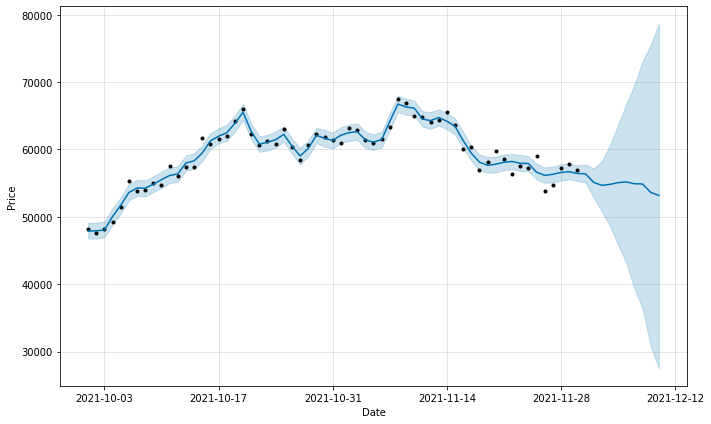

In [ ]:

figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')